In [47]:
# Import initial libraries to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
def header(msg):
    print('-'*60)
    print('['+ msg +']')

# Explore data

In [49]:
# import dataset and view first five rows
df = pd.read_csv('creditcard.csv')
df.head()
header('features in the raw dataset')
df.columns

------------------------------------------------------------
[features in the raw dataset]


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [50]:
header("No data is missing, yeah!") 
print("Number of missing data: ", df.isnull().sum().max())

------------------------------------------------------------
[No data is missing, yeah!]
Number of missing data:  0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


------------------------------------------------------------
[Origina data set is highly skewed:]
No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


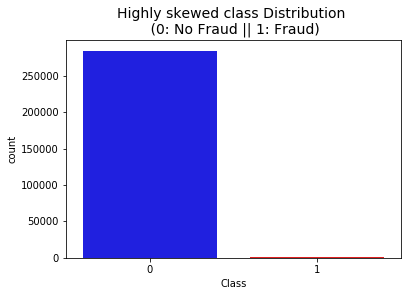

In [18]:
# The classes are heavily skewed, we need to solve this issue later and check correlation among features after that.
header('Origina data set is highly skewed:')
print('No Frauds:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

#Visulaize the skewed dataset
colors=['blue', 'red']

sns.countplot('Class', data=df, palette=colors)
plt.title('Highly skewed class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.savefig('Imbalance.jpg')

# Scale 'Time' and 'Amount'
#From df.describe(), we also know the 'Time' and 'Amount' are not scaled while the rest are, we'll need to scale these two. But before that, let's explore these two features to see whether we can get any special infomation

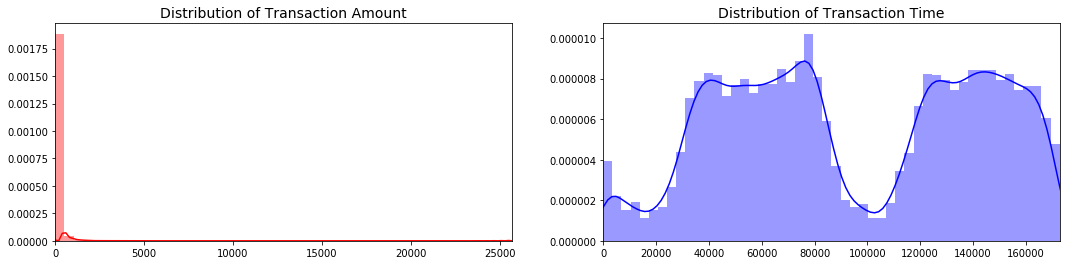

In [19]:
#explore 'Time' and 'Amount'
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.savefig('Time&Amount.jpg')
plt.show()

#scale 'Time' and 'Amount', then define scaled features as 'ScaledTime' and 'ScaledAmount'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['ScaledAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['ScaledTime'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))


In [51]:
#Proceed to drop the Time and Amount features
df = df.drop(['Time', 'Amount'],axis=1)

#View new feature created
header("View new feature created")
df.head()

------------------------------------------------------------
[View new feature created]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [52]:
#Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve,matthews_corrcoef, roc_curve, f1_score, precision_score,roc_auc_score,average_precision_score,recall_score, confusion_matrix

# Split train and test dataset

In [53]:
#Specify training and testing features
X = df.drop(['Class'],axis=1)
y = df.Class

#Split the data into train and test data sets, we'll leave the original_test data untouched
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')

print("Train dataset valid and fraudulent:", train_counts_label/ len(original_ytrain))
print("Test  dataset valid and fraudulent:", test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

Train dataset valid and fraudulent: [1. 0.]
Test  dataset valid and fraudulent: [1. 0.]


# Oversample skewed training data using SMOTE DURING cross_validation
Next we'll oversample the training data using SMOTE during cross_validation, and leave our validation data
untouched. Notice a common mistake is oversample data prior to cross_validation, in this case there
will be a data leakage problem, which leads to overfitting

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

kf= KFold(n_splits=5, random_state=42)
# List to append the score and then find the average of difference folds
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

#build models...

#logistic regression

clf= LogisticRegression()
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
cv = GridSearchCV(clf, param_grid)

# Implementing SMOTE Technique during cross_validation
header("Logistic regression:")
for train, test in kf.split(original_Xtrain, original_ytrain):
   
    pipeline = imbalanced_make_pipeline(SMOTE(), cv)
    pipeline.fit(original_Xtrain[train], original_ytrain[train])
    prediction = cv.best_estimator_.predict(original_Xtrain[test])
    
    accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_list.append(precision_score(original_ytrain[test], prediction))
    recall_list.append(recall_score(original_ytrain[test], prediction))
    f1_list.append(f1_score(original_ytrain[test], prediction))
    auc_list.append(roc_auc_score(original_ytrain[test], prediction))
    

print("Best params: {}".format(cv.best_params_))
print("Accuracy: {}".format(np.mean(accuracy_list)))
print("Precision: {}".format(np.mean(precision_list)))
print("Recall: {}".format(np.mean(recall_list)))
print("f1 score: {}".format(np.mean(f1_list)))
print(30*'-')


Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
------------------------------------------------------------
[Logistic regression:]
Best params: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.9747152669578003
Precision: 0.05877721392766481
Recall: 0.905843653250774
f1 score: 0.11034342814594456
------------------------------


Text(0.5, 1.0, 'OverSampled (SMOTE) Precision-Recall curve')

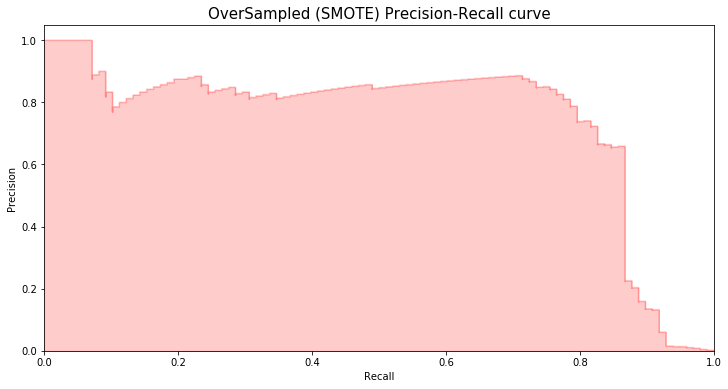

In [73]:
from sklearn.metrics import precision_recall_curve

y_score_lr= best_est.decision_function(original_Xtest)
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampled (SMOTE) Precision-Recall curve', fontsize=15)

In [58]:
# build Random forest model
from sklearn.ensemble import RandomForestClassifier as rf

rf_clf= rf()
header('Random Forest:')
for train, test in kf.split(original_Xtrain, original_ytrain):
   
    pipeline = imbalanced_make_pipeline(SMOTE(), rf_clf)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    #best_est = grid_cv.best_estimator_
    #prediction = best_est.predict(original_Xtrain[test])
    prediction = rf_clf.predict(original_Xtrain[test])
    
    accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_list.append(precision_score(original_ytrain[test], prediction))
    recall_list.append(recall_score(original_ytrain[test], prediction))
    f1_list.append(f1_score(original_ytrain[test], prediction))
    auc_list.append(roc_auc_score(original_ytrain[test], prediction))
    

print("Accuracy: {}".format(np.mean(accuracy_list)))
print("Precision: {}".format(np.mean(precision_list)))
print("Recall: {}".format(np.mean(recall_list)))
print("f1 score: {}".format(np.mean(f1_list)))
print('---' * 30)


------------------------------------------------------------
[Random Forest:]
Accuracy: 0.9911006751665974
Precision: 0.5764660730623362
Recall: 0.8271078431372552
f1 score: 0.576461632311902
------------------------------------------------------------------------------------------


In [67]:
#classification_report
from sklearn.metrics import classification_report

header('Logistic Regression:')
labels = ['Valid', 'Fraud']
best_est=cv.best_estimator_
lr_predict = best_est.predict(original_Xtest)
print(classification_report(original_ytest, lr_predict, target_names=labels))


header('Random Forest:')
labels = ['Valid', 'Fraud']
rf_predict = rf_clf.predict(original_Xtest)
print(classification_report(original_ytest, rf_predict, target_names=labels))


------------------------------------------------------------
[Logistic Regression:]
              precision    recall  f1-score   support

       Valid       1.00      0.97      0.98     56864
       Fraud       0.05      0.93      0.10        98

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

------------------------------------------------------------
[Random Forest:]
              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56864
       Fraud       0.87      0.84      0.85        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [74]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

------------------------------------------------------------
[Logistic regression:]
Recall metric in the testing dataset:  0.9285714285714286


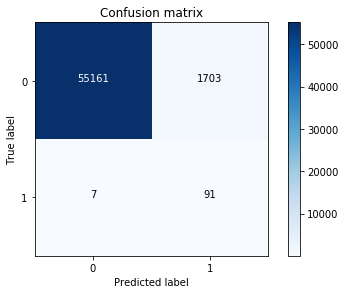

------------------------------------------------------------
[Random forest:]
Recall metric in the testing dataset:  0.8367346938775511


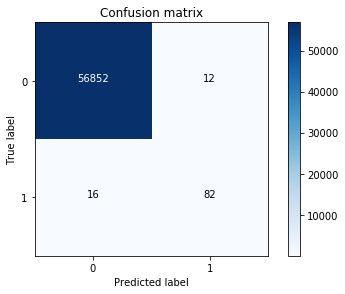

In [75]:
from sklearn.metrics import confusion_matrix

lr_predict = best_est.predict(original_Xtest)
# Compute confusion matrix
cnf_matrix = confusion_matrix(original_ytest, lr_predict)
np.set_printoptions(precision=2)
header("Logistic regression:")
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.savefig('ConfusionMatrix_lr.jpg')
plt.show()
#-------------------------------------------------------------

rf_predict = rf_clf.predict(original_Xtest)
# Compute confusion matrix
cnf_matrix = confusion_matrix(original_ytest, rf_predict)
np.set_printoptions(precision=2)
header("Random forest:")
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.savefig('ConfusionMatrix_rf.jpg')
plt.show()